In [ ]:
# A general multi-dimensional system can go through linear regression with the help of a feature function g() the maps the multi dimensional data to a linear space that then can undergo linear regression in the method we have done.

In [ ]:
# The structure of vectors for the perceptron learning are the same for AND, OR & XOR-
# x=[x1,x2,x3,x4], y=[y1,y2,y3,y4] and the weight vector is w=[[w0],[w1],[w2]]
# combining x and y and the 1 for the bias we get we get X=[[1,1,1,1],[x1,x2,x3,x4],[y1,y2,y3,y4]]

#for the NOT function our vectors are X=[[1,1],[x1,x2]] and w=[[w0],[w1]]

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plr2d_vectorize(X ,T, N):
    #initilize input as np array and convert to row vector
    X=np.array(X)
    if (np.size(X,0) >= np.size(X,1)):
      X=np.transpose(X)

    #initilize weight vector
    W=np.zeros((X.shape[0]+1,1))
    
    # Perceptron learning
    for n in range(0,N,1):
      mismatched=False
      for i in range(T.shape[0]):
        z=np.dot(X[:,i],W[1:])+W[0]
        if z*(T[i]) <= 0:
          mismatched = True
          W[0] = W[0] + (T[i])*1
          W[1] = W[1] + (T[i])*(X[0,i])
          W[2] = W[2] + (T[i])*(X[1,i])
      if mismatched == False:
        print("converged: n=",n)
        break

    print("learning done")
    for i in range(0,T.shape[0]):
      z=np.dot(X[:,i],W[1:])+W[0]
      if z*(T[i]) <= 0:
        print("mismatch[",i,"]")

    return W

In [ ]:
def plr1d(x1,t,N):
  w0=0
  w1=0
  for n in range(0,N,1):
    mismatched = False
    for i in range(0,t.size,1):
      z=w0 + x1[i]*w1
      if z*(t[i]) <= 0:
        mismatched = True
        w0 = w0 + (t[i])*1
        w1 = w1 + (t[i])*(x1[i])
    if mismatched == False:
      print("converged: n=",n)
      break
  print("learning done")
  for i in range(0,t.size,1):
      z=w0 + x1[i]*w1
      if z*(t[i]) <= 0:
        print("mismatch[",i,"]")
  return [w0,w1]

In [ ]:
def plot_sep(w, X, Y, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  w0=w[0]
  w1=w[1]
  w2=w[2]
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  plt.ylim([np.amin(X[:,1]),np.amax(X[:,1])])
  plt.xlim([np.amin(X[:,0]),np.amax(X[:,0])])
  plt.xlabel("X1")
  plt.ylabel("X2")
  if w2 != 0:
     m = -w1/w2
     t = 1 if w2 > 0 else -1
     plt.plot([np.amin(X[:,0]),np.amax(X[:,0])],[np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],'-y',color=color)
     plt.fill_between(
                    [np.amin(X[:,0]),np.amax(X[:,0])],
                    [np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],
                    [t*np.amax(np.abs(X[:,1]))],
                    alpha=0.2,
                    color=color)
  if w2 == 0: # decision boundary is vertical
      t = 1 if w1 > 0 else -1
      plt.plot([0, 0],[np.amin(X[:,0]), np.amax(X[:,0])],'-y',color=color)
      plt.fill_between(
                    [0, np.amax(np.abs(X))*t],
                    [-np.amax(np.abs(X))],
                    [np.amax(np.abs(X))],
                    alpha=0.2,
                    color=color)

In [ ]:
def plot_sep1(x,y, w, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  w0=w[0]
  w1=w[1]
  plt.scatter(x,x,c=y,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  plt.ylim([np.amin(x),np.amax(x)])
  plt.xlim([np.amin(x),np.amax(x)])
  plt.xlabel("sepal length")
  plt.ylabel("sepal width")

  t = 1 if w1 > 0 else -1
  plt.plot([np.amin(x),np.amax(x)],[np.amin(x)*w1+w0,np.amax(x)*w1+w0],'-y',color=color)
  plt.fill_between(
                    [np.amin(x),np.amax(x)],
                    [np.amin(x)*w1+w0,np.amax(x)*w1+w0],
                    [t*np.amax(x), t*np.amax(x)],
                    alpha=0.2,
                    color=color)

converged: n= 1
learning done
[-1.0, 1.0, 1.0]


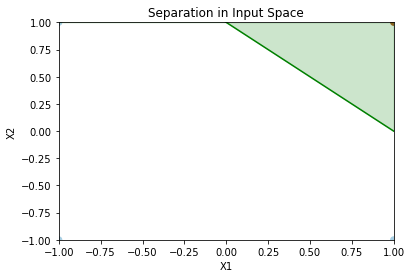

In [ ]:
# AND function
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,-1,-1,1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,2)
print([w0,w1,w2])
plot_sep([w0,w1,w2], np.transpose(x), t)

converged: n= 1
learning done
[1.0, 1.0, 1.0]


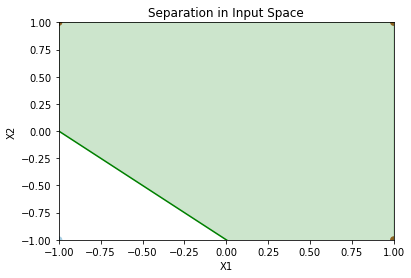

In [ ]:
# OR function
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,1,1,1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,2)
print([w0,w1,w2])
plot_sep([w0,w1,w2], np.transpose(x), t)

converged: n= 1
learning done
[0, -2]


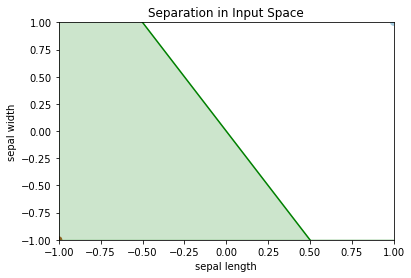

In [ ]:
# NOT function
x=np.array([-1,1])
t=np.array([1,-1])
[w0,w1]=plr1d(x,t,2)
print([w0,w1])
plot_sep1(x,t, [w0,w1])

learning done
mismatch[ 0 ]
mismatch[ 1 ]
mismatch[ 2 ]
mismatch[ 3 ]
[0.0, 0.0, 0.0]


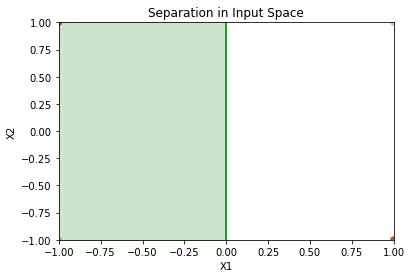

In [ ]:
# XOR function
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,1,1,-1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,1)
print([w0,w1,w2])
plot_sep([w0,w1,w2], np.transpose(x), t)

In [ ]:
# the weights we achieve from the code match the ones that were calculated by hand using the perceptron learning rule.
#from the graph plotted above we can see that the XOR function in non linear as the 2 classifications are not 2 disjoint convex sets-
# at 0,0 there exists a point that exists on both the lines drawn from -1, -1 to 1,1 and 1,0 to 0,1.  